In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [5]:
# Load dataset
data = pd.read_csv(r"C:\CJ\All Models\Random Forest\Dataset\diabetes.csv")

# Preview
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
# Columns where 0 is invalid
invalid_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in invalid_cols:
    data[col] = data[col].replace(0, np.nan)   # replace 0 with NaN
    data[col] = data[col].fillna(data[col].median())   # fill NaN with median


In [9]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

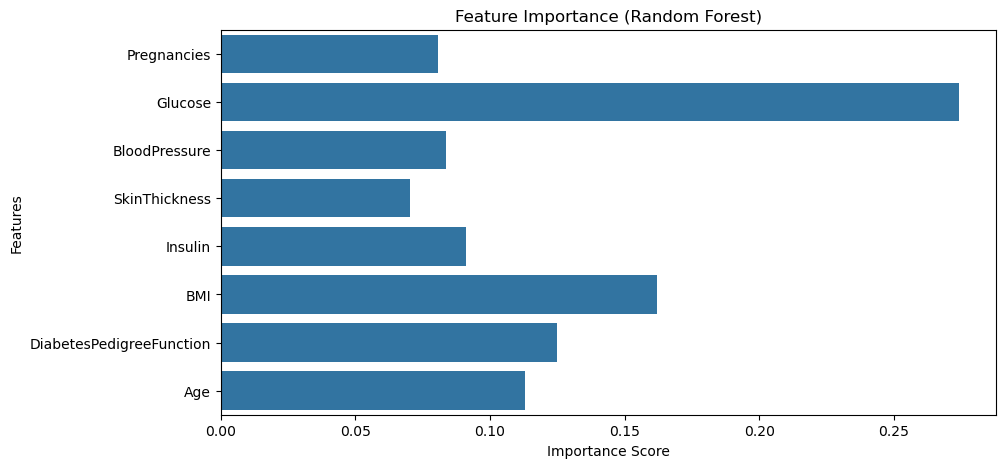

In [15]:
importances = rf.feature_importances_
feat_names = X.columns
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.savefig(r"C:\CJ\All Models\Random Forest\Output\output.png", dpi = 300)
plt.show()

Accuracy: 0.7792207792207793
Precision: 0.7272727272727273
Recall: 0.5925925925925926
F1 Score: 0.6530612244897959

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



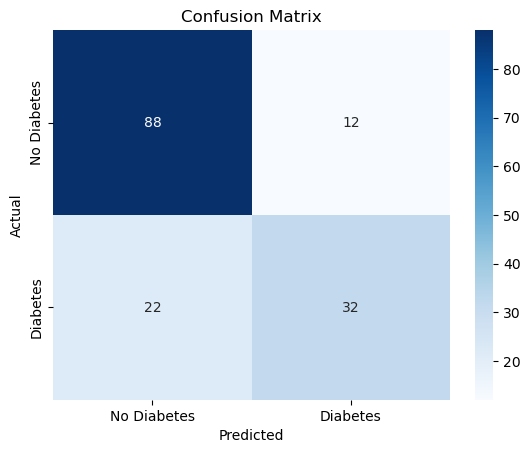

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Diabetes","Diabetes"], yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(r"C:\CJ\All Models\Random Forest\Output\conf_matrix.png", dpi = 300)
plt.show()